# Project - Cdiscount Image Classification



# Data ingestion
The primary training set is a 57GB bson file, having ~15 Million images (180x180 images in Base64 format) of ~7.06 Million products. We have imported the dataset into a MongoDB instance on a VPS, so we were able to query among the records.
We have chosen 100 categories, which overally consist of ~246K images of ~110K products.


## Dataset preparation

First we need to ensure that the "gdown" library is installed and accessible in the environment and download the train_medium data from Google Drive,

#### Dataset preparation

First we need to ensure that the "gdown" library is installed and accessible in the environment and download the train_shuffled_100cat data from Google Drive:

In [ ]:
! pip install gdown

In [ ]:
! gdown --id 1JGaRoMrVAUregwwd_SpEJA-xjHRKMn9h
! tar -xvzf data-100cat.tar

Streaming output truncated to the last 5000 lines.
data-100cat/test/22/21858992-240998-22.jpg
data-100cat/test/22/20561929-234357-22.jpg
data-100cat/test/22/20035991-240826-22.jpg
data-100cat/test/22/8728852-238925-22.jpg
data-100cat/test/22/6480986-240592-22.jpg
data-100cat/test/22/1017237-235741-22.jpg
data-100cat/test/22/17219497-240365-22.jpg
data-100cat/test/22/14192550-239967-22.jpg
data-100cat/test/22/16222846-241971-22.jpg
data-100cat/test/22/269319-244981-22.jpg
data-100cat/test/22/15705247-234063-22.jpg
data-100cat/test/22/919348-245183-22.jpg
data-100cat/test/22/15332630-245886-22.jpg
data-100cat/test/22/20398698-238247-22.jpg
data-100cat/test/22/5305359-239251-22.jpg
data-100cat/test/22/15120167-237969-22.jpg
data-100cat/test/22/18443414-237295-22.jpg
data-100cat/test/22/19325430-242982-22.jpg
data-100cat/test/22/22419968-243974-22.jpg
data-100cat/test/22/14281356-245734-22.jpg
data-100cat/test/22/12845927-236015-22.jpg
data-100cat/test/22/23581567-243539-22.jpg
data-100cat

### Directory preparation
In case you have the train_shuffled_100cat.csv file downloaded in your environment, you can create the directories and images using the snippet below

*Important note: If you've downloaded the compressed directory from this notebook, skip the cell below*

In [ ]:
# Adapt the paths to your environment
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import base64
import io
from pathlib import Path

# FILE="train_shuffled_100cat.csv"

    

# df=pd.read_csv(FILE, header=3)
# df.describe()

# categories = df['category_id'].unique()
# categories.sort()
# category_id_map = {k: v for v, k in enumerate(categories)}
# df["class"] = df["category_id"].apply(lambda x: category_id_map[x])

# rdf = df.sample(frac=1, random_state=123)
# rdf.reset_index(drop=True, inplace=True)
# count = rdf.shape[0]
# num_train = int(count * .75) #= splitting point of train/val set
# num_val = num_train + int(count * .2)

# for idx, rec in rdf.iterrows():
#     folder = "train" if idx < num_train else ("val" if idx < num_val else "test")
#     classname = rec["class"]
#     Path("data-100cat/%s/%d"%(folder, classname)).mkdir(parents=True, exist_ok=True)
#     fh = open("data-100cat/%s/%d/%d-%d-%d.jpg"%(folder,  classname, rec["id"], idx, classname ) , "wb")
#     fh.write(
#                 base64.b64decode(
#                     rec["image"]
#                 )
#             )
#     fh.close()
#     if idx % 10000==0:
#         print(idx, "Done")
    

#### Note for the team
Since the original dataset is pretty large, I've created a subset file containing ~250K photos in 100 categories, exported the base64 images into train/val/test directories and in each directory, separated the samples into subdirectories named with their labels.

## Environment setup

Import the required libraries

In [ ]:
# import pandas as pd

# import base64
# from PIL import Image
# import base64
# import io
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt

In [ ]:
# ! pip install gdown && gdown --id 1F6Xf4yiYxeFEN6qhrL3YBNs0Vhx0bXJ1

In [ ]:
%matplotlib inline
import tensorflow as tf
import tensorflow_datasets as tfds # tensorflow datasets - pip install tensorflow-datasets
import numpy as np
import glob
import matplotlib.pyplot as plt
from skimage import transform # pip install scikit-image

## Note for the team
Since the original dataset is pretty large, I've created a subset file containing ~250K photos in 100 categories, but it is still so large that it may not fit into the memory, so I've used the below parameters to load a fitable subset accordingly, please read the comments of each variable careflully, and do not change the loading code please, just set the values of the parameters.

In [ ]:
# import pandas as pd

# import base64
# from PIL import Image
# import base64
# import io
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt

Run the cell below if you have a gpu that you want to use

In [ ]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#if len(physical_devices):
    #tf.config.experimental.set_memory_growth(physical_devices[0], True)
#print(physical_devices)

## 1. Load your data

In [ ]:
# CONVERT_TO_NP_ARRAY= False   # Wether convert the Base64 string to (180,180,3) arrays or keep the Base64 string.

# REPLACE_BASE64_SPECIAL_CHARS = True # If you have the base64 decoding layer in your model, 
#                                     # you need to set this to True to replace the two special characters in Base64 that is incompatible with tf image reader

# LOADING_MODE = "all" 
#                              # num_records: Loads the first NUM_RECORDS in the dataset and calculates NUM_CATEGORIES dynamically
#                              # num_categories: Loads first NUM_CATEGORIES and calculates NUM_RECORDS dynamically
#                              # all: Loads all the 250K images, ignores all parameters below
                            
    
# NUM_RECORDS = 3000           # Only used when the mode is set to num_records
NUM_CATEGORIES = 100           # Only used when the mode is set to num_category
MAX_RECORDS_PER_CATEGORY = 700 # if not zero, will ensure that there is no more per category in the dataframe, won't work when mode is set to all

In [ ]:
# def get_array_from_base64(img, shape=(180,180,3)):
#     print(img)
#     return np.array(
#         Image.open(
#             io.BytesIO(
#                 base64.b64decode(
#                     img.replace('_', '/').replace('-', '+') if REPLACE_BASE64_SPECIAL_CHARS else img
#                 )
#             )
#         )
#     ).reshape(shape)


In [ ]:
# FILE_NAME= "train_shuffled_100cat.csv"
# header = 3

# df = pd.read_csv(FILE_NAME, header=3, nrows=0)

# if LOADING_MODE == "all":
#     df = pd.read_csv(FILE_NAME, header=header)

# if LOADING_MODE == "num_records":
#     reader = pd.read_csv(FILE_NAME, header=header, chunksize=min(NUM_RECORDS, 100))
#     for chunk in reader:
#         df = df.append(chunk, ignore_index=True)
#         if MAX_RECORDS_PER_CATEGORY:
#             for cat in df["category_id"].unique():
#                 if len(df[df["category_id"] == cat]) > MAX_RECORDS_PER_CATEGORY:
#                     removed_rows = df[df["category_id"] == cat][MAX_RECORDS_PER_CATEGORY:]
#                     df = df.drop(removed_rows.index)
#         if df.shape[0]>=NUM_RECORDS:
#             df = df.head(NUM_RECORDS)
#             break
    
# elif LOADING_MODE == "num_categories": 
#     reader = pd.read_csv(FILE_NAME, header=header, chunksize=100)
#     for chunk in reader:
#         df = df.append(chunk, ignore_index=True)
#         if df["category_id"].nunique() > NUM_CATEGORIES:
#             break
#     if MAX_RECORDS_PER_CATEGORY:
#         for cat in df["category_id"].unique():
#             if len(df[df["category_id"] == cat]) > MAX_RECORDS_PER_CATEGORY:
#                 removed_rows = df[df["category_id"] == cat][MAX_RECORDS_PER_CATEGORY:]
#                 df = df.drop(removed_rows.index)

#     cat_removed = df["category_id"].unique()[NUM_CATEGORIES:]
#     df = df.loc[~df['category_id'].isin(cat_removed)]
#     NUM_RECORDS= df.shape[0]

# if CONVERT_TO_NP_ARRAY:        
#     df["image"] = df["image"].apply(
#                     lambda x: get_array_from_base64(x)
#                 )
# if REPLACE_BASE64_SPECIAL_CHARS:
#     df["image"] = df["image"].apply(
#                     lambda x: x.replace('/', '_').replace('+', '-')
#                 )
    
# NUM_CATEGORIES = df['category_id'].nunique()

# categories = df['category_id'].unique()
# categories.sort()
# category_id_map = {k: v for v, k in enumerate(categories)}
# df["class"] = df["category_id"].apply(lambda x: category_id_map[x])

# print("Num records:", NUM_RECORDS)
# print("Num categories:", NUM_CATEGORIES)
# print("Training df shape:", df.shape)
# print("Mem used by images:", int(sum(df["image"].apply(lambda x: x.nbytes if type(x)!=str else len(x))/10 ** 6)), "MB")
# # print(len(df.at[0, "image"]))

In [ ]:
# df = df.sample(frac=1,random_state = 123)
# df.reset_index(drop=True, inplace=True)


In [ ]:
# X_dev = np.stack(df["image"]) if CONVERT_TO_NP_ARRAY else np.array(df["image"])
# Y_dev = np.array(df["class"])
# print(X_dev.shape,Y_dev.shape, Y_dev[-10:])


## 2. Explore your data 

Showing 10 samples from dev set

In [ ]:
# plt.figure(figsize=(12, 6), dpi=1000)
# indexes = np.arange(len(X_dev))
# np.random.shuffle(indexes)
# if CONVERT_TO_NP_ARRAY:
#     for idx in range(10):
#       plt.subplot(2, 5, idx + 1)
#       plt.imshow(X_dev[indexes[idx]])
#     plt.show()

#Splitting dev set into train/val set

In [ ]:
# num_train = int(len(X_dev) * .75) #= splitting point of train/val set
# num_val = int(len(X_dev) * .2)
# num_test = len(X_dev) - num_train - num_val

# X_train = X_dev[indexes[:num_train]]
# Y_train = Y_dev[indexes[:num_train]]

# X_val = X_dev[indexes[num_train:-num_test]]
# Y_val = Y_dev[indexes[num_train:-num_test]]

# X_test = X_dev[indexes[-num_test:]]
# Y_test = Y_dev[indexes[-num_test:]]

# print("X_train:", X_train.shape)
# print("X_val:", X_val.shape)
# print("X_test:", X_test.shape)

## 3. Represent your labels using one hot encoding

In [ ]:
# Y_train_oh = tf.keras.utils.to_categorical(Y_train, num_classes = NUM_CATEGORIES)
# Y_val_oh = tf.keras.utils.to_categorical(Y_val, num_classes = NUM_CATEGORIES)
# Y_test_oh = tf.keras.utils.to_categorical(Y_test, num_classes = NUM_CATEGORIES)


# print("Y_train",  Y_train[:3])
# print("Y_train_oh:",  Y_train_oh[:3])


# print("TRAIN:", X_train.shape, Y_train.shape, Y_train_oh.shape)
# print("VAL:", X_val.shape, Y_val.shape, Y_val_oh.shape)
# print("TEST:", X_test.shape, Y_test.shape, Y_test_oh.shape)

## 4. Data scaling and Data augmentation

### Preprocess_and_decode:
It is a function which applies to each image input to the model, it first decodes the JPEG base64 encoded image to a tensor, then it scales it based on the sample's min, max, mean and std.
Since we are normalizing our data per sample, our normalization is row-wise and a column-wise normalization is not yet an option. We can do this by preprocessing our dataset by batching it if that seemed necessary. 

In [ ]:
def preprocess_and_decode(img_str, new_shape=(180,180), scaling_mode = 2 ): #scaling_mode= 0: disabled, 1: min-max normalization, 2: standardization
    img = tf.io.decode_base64(img_str)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, new_shape, method=tf.image.ResizeMethod.BILINEAR)
   
    if scaling_mode == 1: 
      img_min = tf.math.reduce_min(img, axis=None, keepdims=False, name=None)
      img_max = tf.math.reduce_max(img, axis=None, keepdims=False, name=None)
      img = ( img - img_min ) / (img_max - img_min)
      
    elif scaling_mode == 2:
      img_mean = tf.math.reduce_mean(img, axis=None, keepdims=False, name=None)
      img_std = tf.math.reduce_std(img, axis=None, keepdims=False, name=None)
      img = ( img - img_mean ) / img_std
      
    return img


### About data augmentation
Since our dataset consist of 2-4 image per product, and we have over 2K images per category, data augmentation seems unnecessary.
I still have not found a way to do data augmentation on Base64 strings(remember I moved to Base64-> tensor decoding inside the model itself to enable us to do batch training on the whole dataset), but if we come to a need for it, there is definitly a way to do that!


### **Data stuff from new aug by AMIN**

In [ ]:
# seed = 909 # (IMPORTANT) to input image and corresponding target with same augmentation parameter.

# gen_params = {"rescale":1.0/255,"featurewise_center":False,"samplewise_center":False,"featurewise_std_normalization":False,\
#               "samplewise_std_normalization":False,"zca_whitening":False,"rotation_range":20,"width_shift_range":0.1,"height_shift_range":0.1,\
#               "shear_range":0.2, "zoom_range":0.1,"horizontal_flip":True,"fill_mode":'constant',\
#                "cval": 0}

# train_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params) 

# train_image_generator = train_image_datagen.flow_from_directory("data-100cat/train/",
#                                                     class_mode="sparse", target_size=(180, 180), batch_size = 32,seed=seed,shuffle = True)


# val_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 

# val_image_generator = val_image_datagen.flow_from_directory("data-100cat/val/",
#                                                      class_mode="sparse", batch_size = 32,seed=seed, target_size=(180, 180),color_mode='rgb',shuffle = True)

# test_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 

# test_image_generator = val_image_datagen.flow_from_directory("data-100cat/test/",
#                                                      class_mode="sparse", batch_size = 32,seed=seed, target_size=(180, 180),color_mode='rgb')

! mkdir data-100cat/test/66
seed = 909 # (IMPORTANT) to input image and corresponding target with same augmentation parameter.

gen_params = {"rescale":1.0/255,"featurewise_center":False,"samplewise_center":False,"featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,"zca_whitening":False,"rotation_range":20,"width_shift_range":0.1,"height_shift_range":0.1,\
              "shear_range":0.2, "zoom_range":0.1,"horizontal_flip":True,"fill_mode":'constant',\
               "cval": 0}

train_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params) 

train_image_generator = train_image_datagen.flow_from_directory("data-100cat/train/",
                                                    class_mode="categorical",  classes=[str(i) for i in range(99)], target_size=(180, 180), batch_size = 32,seed=seed,shuffle = True)

val_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 

val_image_generator = val_image_datagen.flow_from_directory("data-100cat/val/",
                                                     class_mode="categorical",  classes=[str(i) for i in range(99)],batch_size = 32,seed=seed, target_size=(180, 180),color_mode='rgb',shuffle = True)

test_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 

test_image_generator = val_image_datagen.flow_from_directory("data-100cat/test/",
                                                     class_mode="categorical", classes=[str(i) for i in range(99)],batch_size = 32,seed=seed, target_size=(180, 180),color_mode='rgb')

Found 184695 images belonging to 99 classes.
Found 49252 images belonging to 99 classes.
Found 12314 images belonging to 99 classes.


In [ ]:
x, y = next(train_image_generator)
print("Train:", x.shape, y.shape, y[:10])
x, y = next(val_image_generator)
print("Val:", x.shape, y.shape, y[:10])
x, y = next(test_image_generator)
print("Test:", x.shape, y.shape, y[:10])

Train: (32, 180, 180, 3) (32, 99) [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

(32, 180, 180, 3) (32, 99)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


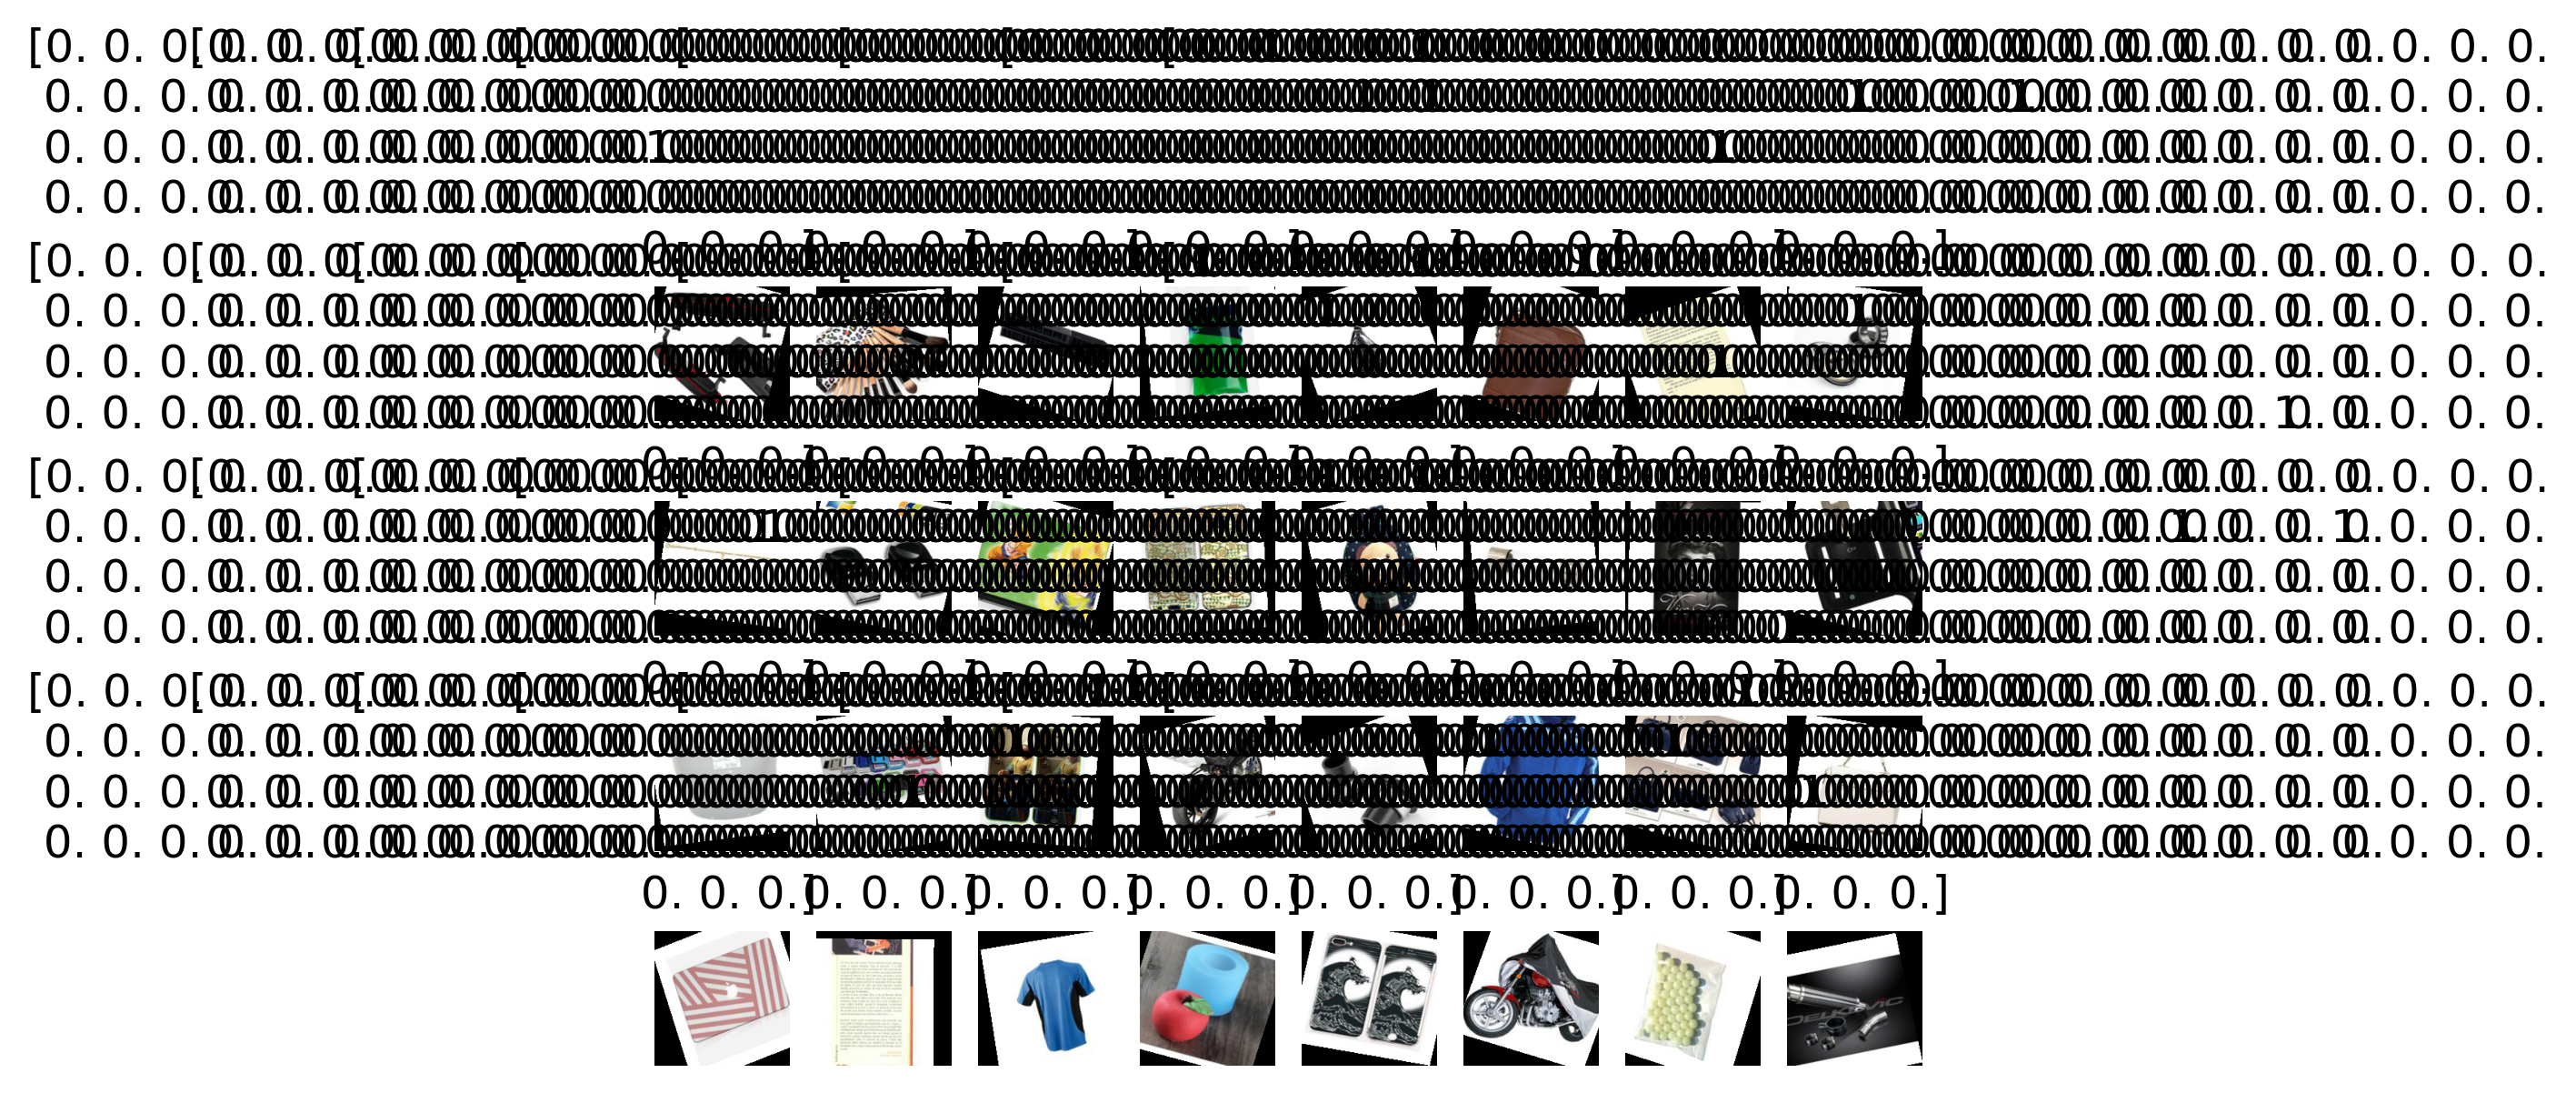

(32, 180, 180, 3) (32, 99)


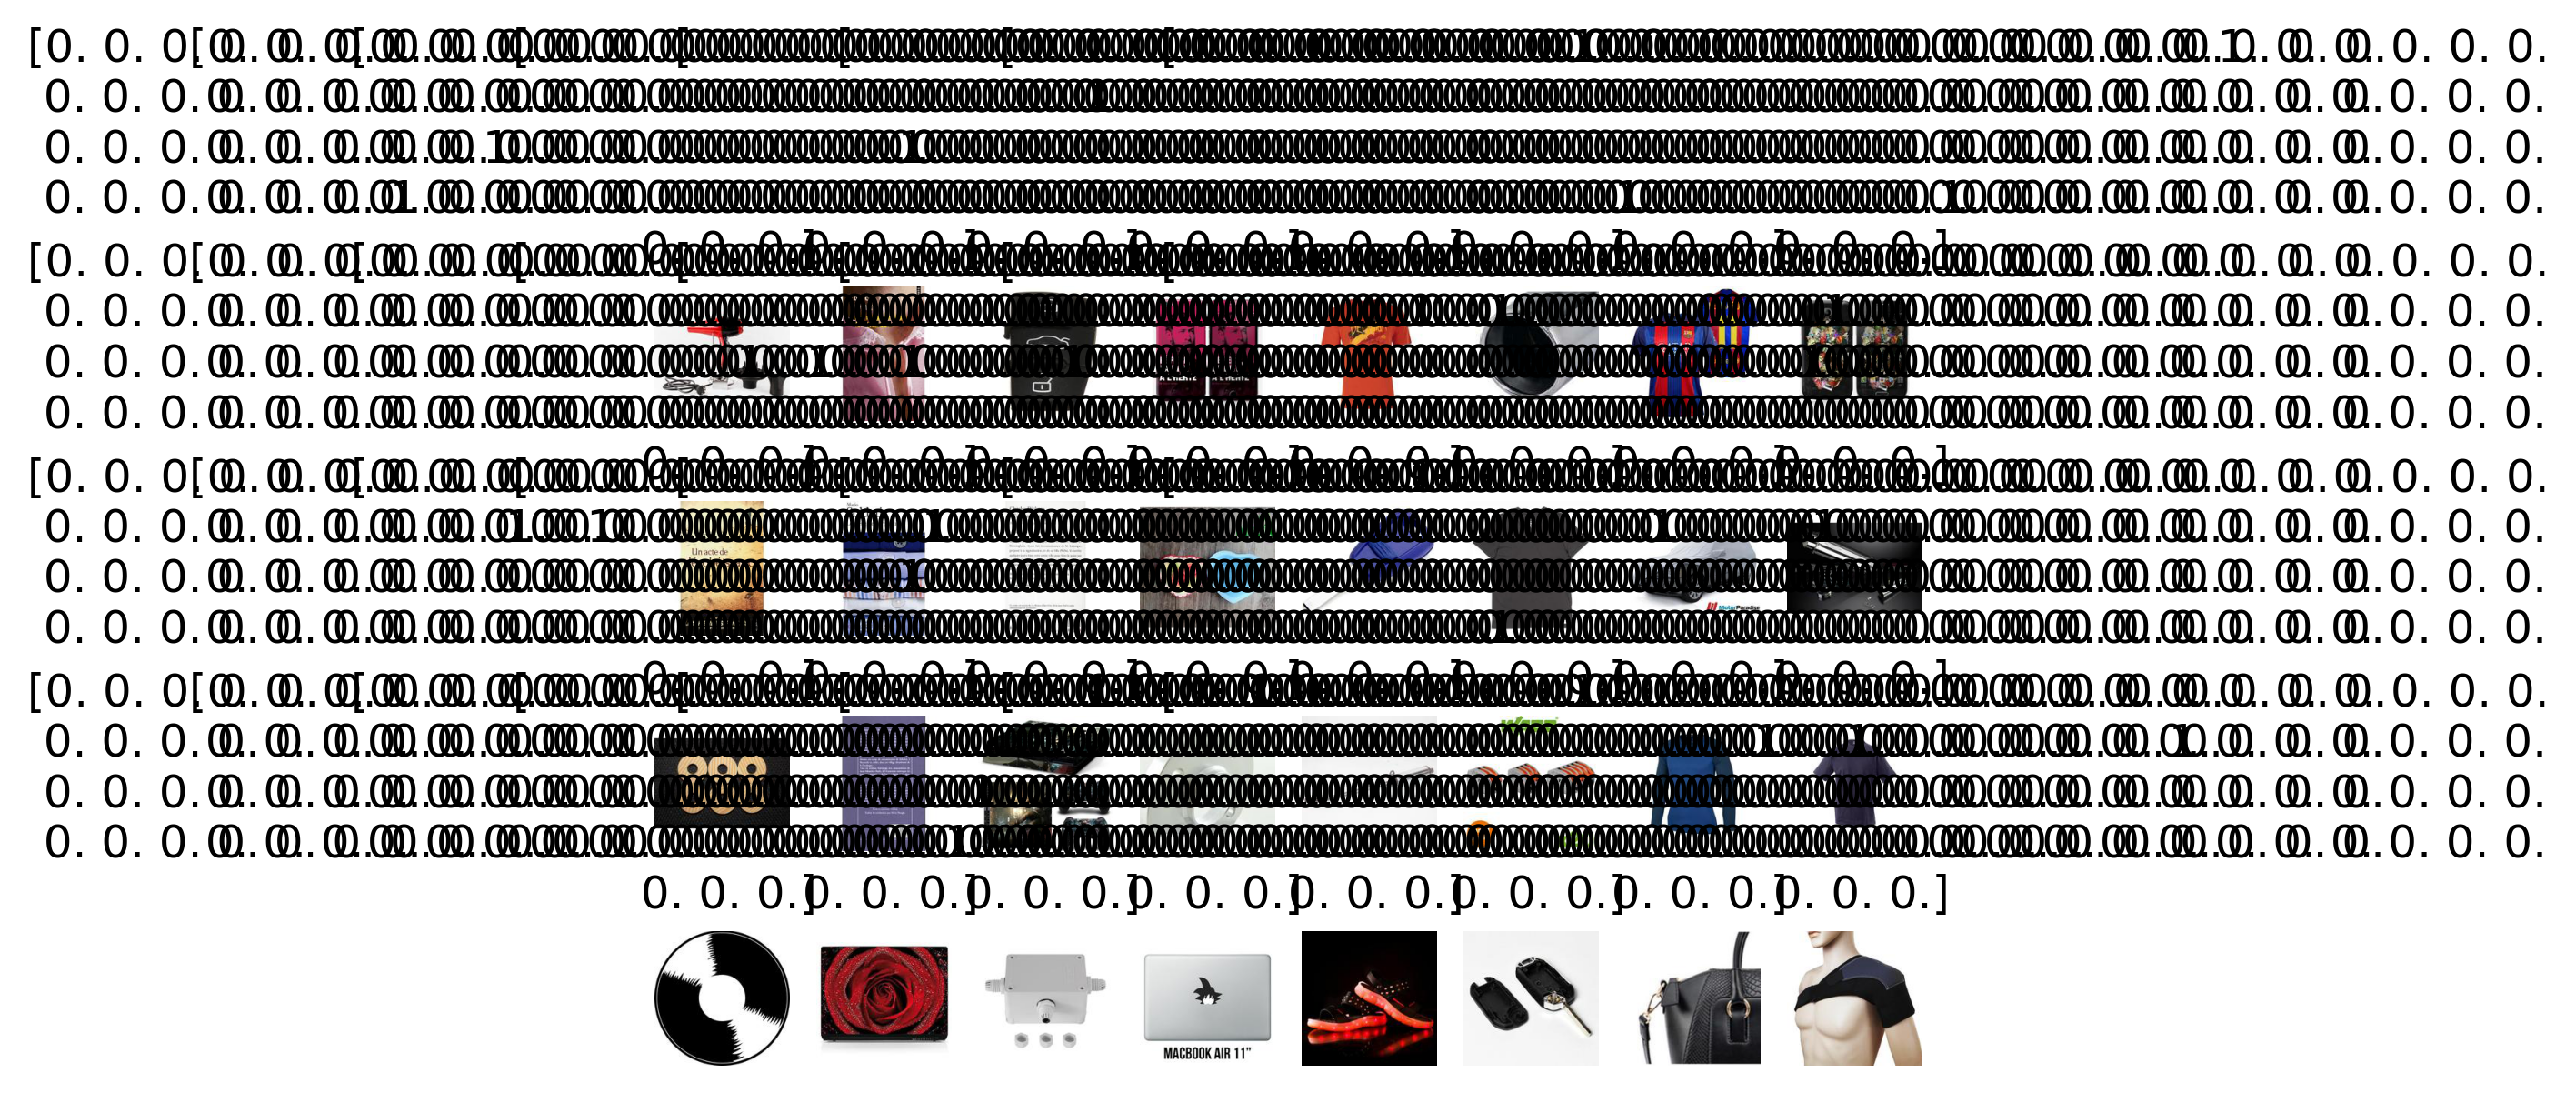

In [ ]:
x, y = next(train_image_generator)
print(x.shape, y.shape)
plt.figure(figsize = (6,4), dpi = 300)
for ii in range(x.shape[0]):
  plt.subplot(4,8,ii+1)
  plt.imshow(x[ii])
  plt.axis("off")
  plt.title(y[ii])
plt.show()
xv, yv = next(val_image_generator)
print(xv.shape, yv.shape)
plt.figure(figsize = (6,4), dpi = 300)
for ii in range(x.shape[0]):
  plt.subplot(4,8,ii+1)
  plt.imshow(xv[ii])
  plt.axis("off")
  plt.title(yv[ii])
plt.show()

## 4. Define your callbacks (save your model, patience, etc.)

In [ ]:
model_name = "vgg_project.h5"
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# Learning rate schedule
def scheduler(epoch, lr):
    if epoch%4 == 0 and epoch!= 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

## 6. Transfer Learning

6.1 Choose and load your pretrained model without the top (i.e., the prediction part, usually the fully connected layers)

6.2. Freeze the layers (i.e., make them non-trainable) of your pretrained model

In [ ]:
# Dimensions we will resize the images
img_height = 180
img_width = 180
k = 99
ishape = (180,180,3)
# input64 = tf.keras.layers.Input(shape=(1,), dtype="string")
# img_tensor = tf.keras.layers.Lambda(
#     lambda img: tf.map_fn(lambda im: preprocess_and_decode(im[0]), img, dtype="float32"))(input64)
input_layer = tf.keras.layers.Input(shape=ishape, dtype="float")

base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(img_height, img_width, 3),
    include_top=False) 
base_model.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


6.3. Add a top (i.e., the prediction layers)

In [ ]:
# input_image = tf.keras.Input(shape=(img_height, img_width, 3))
x1 = base_model(input_layer, training=False)
x2 = tf.keras.layers.Flatten()(x1)
out = tf.keras.layers.Dense(k,activation = 'softmax')(x2) # 99 categories
# out = tf.keras.layers.Dense(len(class_names),activation = 'softmax')(x2)
model = tf.keras.Model(inputs = input_layer, outputs =out)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 99)                1267299   
Total params: 15,981,987
Trainable params: 1,267,299
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

model.fit(train_image_generator, epochs = 10, \
          verbose = 1, callbacks= [early_stop, monitor, lr_schedule],validation_data=(val_image_generator))

Epoch 1/10
5772/5772 [==============================] - 1508s 261ms/step - loss: 1.3444 - accuracy: 0.6876 - val_loss: 0.9564 - val_accuracy: 0.7714
Epoch 2/10
5772/5772 [==============================] - 1519s 263ms/step - loss: 0.9612 - accuracy: 0.7655 - val_loss: 0.8377 - val_accuracy: 0.8013
Epoch 3/10
5772/5772 [==============================] - 1470s 255ms/step - loss: 0.8569 - accuracy: 0.7872 - val_loss: 0.7855 - val_accuracy: 0.8124
Epoch 4/10
5772/5772 [==============================] - 1474s 255ms/step - loss: 0.7987 - accuracy: 0.7999 - val_loss: 0.7540 - val_accuracy: 0.8201
Epoch 5/10
5772/5772 [==============================] - 1476s 256ms/step - loss: 0.7381 - accuracy: 0.8139 - val_loss: 0.7323 - val_accuracy: 0.8251
Epoch 6/10
5772/5772 [==============================] - 1484s 257ms/step - loss: 0.7186 - accuracy: 0.8173 - val_loss: 0.7231 - val_accuracy: 0.8273
Epoch 7/10
5772/5772 [==============================] - 1458s 253ms/step - loss: 0.7028 - accuracy: 0.8218

## Testing before fine tuning

In [ ]:
model.load_weights(model_name)
metrics = model.evaluate(test_image_generator)

385/385 [==============================] - 73s 97ms/step - loss: 0.7066 - accuracy: 0.8307


# Fine tunning

In [30]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(img_height, img_width, 3),
    include_top=False) 
base_model.trainable = True
# input64 = tf.keras.layers.Input(shape=(1,), dtype="string")
# img_tensor = tf.keras.layers.Lambda(
#     lambda img: tf.map_fn(lambda im: preprocess_and_decode(im[0]), img, dtype="float32"))(input64)
# input_image = tf.keras.Input(shape=(img_height, img_width, 3))
input_layer = tf.keras.layers.Input(shape=ishape, dtype="float")
x1 = base_model(input_layer, training=True)
x2 = tf.keras.layers.Flatten()(x1)
out = tf.keras.layers.Dense(k,activation = 'softmax')(x2)
model = tf.keras.Model(input_layer, out)
print(model.summary())


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 5, 5, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 99)                1267299   
Total params: 15,981,987
Trainable params: 15,981,987
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.load_weights(model_name)
model.fit(train_image_generator,batch_size = 32, epochs = 8, \
          verbose = 1, callbacks= [early_stop, monitor, lr_schedule],validation_data=(val_image_generator))

Epoch 1/8
5772/5772 [==============================] - 1999s 346ms/step - loss: 0.6087 - accuracy: 0.8417 - val_loss: 0.6449 - val_accuracy: 0.8487
Epoch 2/8
5772/5772 [==============================] - 1983s 343ms/step - loss: 0.5535 - accuracy: 0.8558 - val_loss: 0.6291 - val_accuracy: 0.8521
Epoch 3/8
5772/5772 [==============================] - 1972s 342ms/step - loss: 0.5269 - accuracy: 0.8621 - val_loss: 0.6130 - val_accuracy: 0.8561
Epoch 4/8
5772/5772 [==============================] - 1973s 342ms/step - loss: 0.4945 - accuracy: 0.8692 - val_loss: 0.5990 - val_accuracy: 0.8605
Epoch 5/8
5772/5772 [==============================] - 1971s 342ms/step - loss: 0.4720 - accuracy: 0.8759 - val_loss: 0.5870 - val_accuracy: 0.8621
Epoch 6/8
5772/5772 [==============================] - 1979s 343ms/step - loss: 0.4599 - accuracy: 0.8782 - val_loss: 0.5867 - val_accuracy: 0.8631
Epoch 7/8
5772/5772 [==============================] - 1977s 342ms/step - loss: 0.4570 - accuracy: 0.8792 - val_

## 8. Test your model

In [32]:
model.load_weights(model_name)
metrics = model.evaluate(test_image_generator)

385/385 [==============================] - 37s 96ms/step - loss: 0.5958 - accuracy: 0.8591


In [33]:
Ypred = model.predict(X_test).argmax(axis = 1)
wrong_indexes = np.where(Ypred != Y_test)[0]

# Disaplying some samples from the development set
sample_indexes = np.random.choice(np.arange(wrong_indexes.shape[0], dtype = int),size = 30, replace = False)
plt.figure(figsize = (24,18))
for (ii,jj) in enumerate(sample_indexes):
    plt.subplot(5,6,ii+1)
    aux = X_test[wrong_indexes[jj]]
    aux = (aux - aux.min())/(aux.max() - aux.min())
    plt.imshow(aux, cmap = "gray")
    plt.title("Label: %d, predicted: %d" %(Y_test[wrong_indexes[jj]],Ypred[wrong_indexes[jj]]))
plt.show()

NameError: ignored